In [1]:
from PIL import Image
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading image
graypath = 'images/graylena.png'
binpath = 'images/binary_orig.jpg'
try:
    grayimg=cv2.imread(graypath)
    binimg=cv2.imread(binpath)
except IOError:
    print('Entered path is not right')

In [3]:
gh = grayimg.shape[0]
gw = grayimg.shape[1]
bh = binimg.shape[0]
bw = binimg.shape[1]
print(gh,gw,bh,bw)

256 256 1280 1280


In [4]:
#  resizing binary image to fit inside gray image
binimg = cv2.resize(binimg,(grayimg.shape[0],grayimg.shape[1]),cv2.INTER_AREA)
# cv2.imwrite('binary.jpg', binimg)
# binimg.shape
for x in range(0, int(gh)):
    for y in range(0, int(gw)):
        val = binimg[x,y][0]
        if val >= 128:
            val = 255
        else:
            val = 0
        binimg[x,y] = [val for _ in range(3)]
bh = binimg.shape[0]
bw = binimg.shape[1]
# cv2.imwrite('binary.jpg', binimg)  

In [5]:
print(gh,gw,bh,bw)

256 256 256 256


In [6]:
def imshow(img, title='image'):
#     cv2.imshow(title,img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    plt.axis("off")
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
# Encoding...
for x in range(0, int(gh)):
    for y in range(0, int(gw)):
        if binimg[x,y,0] == 0:
            if not grayimg[x,y,0] % 2 == 0:
                grayimg[x,y] = [(grayimg[x,y][0]+1) for _ in range(3)]
        elif binimg[x,y,0] == 255:
            if not grayimg[x,y,0] % 2 == 1:
                grayimg[x,y] = [(grayimg[x,y][0]+1) for _ in range(3)]

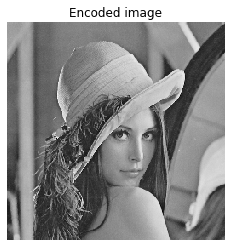

True

In [8]:
imshow(grayimg, 'Encoded image')
cv2.imwrite('output/gray.png',grayimg)

In [9]:
graypath = 'output/gray.png'
try:
    grayimg=cv2.imread(graypath)
except IOError:
    print('Entered path is not right')

In [10]:
# Decoding..
final_img = np.zeros((grayimg.shape[0],grayimg.shape[0],3),np.uint8)

for x in range(0, int(gh)):
    for y in range(0, int(gw)):
        if grayimg[x,y,0] % 2 == 1:
            final_img[x,y] = [255 for _ in range(3)]

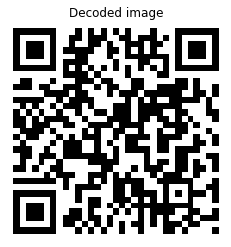

True

In [11]:
imshow(final_img, 'Decoded image')
cv2.imwrite('output/bin.png',final_img)